In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from ast import literal_eval
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp


In [37]:
data = pd.read_csv('history.csv')

print('number of episodes finished %d'%len(data))


number of episodes finished 7511


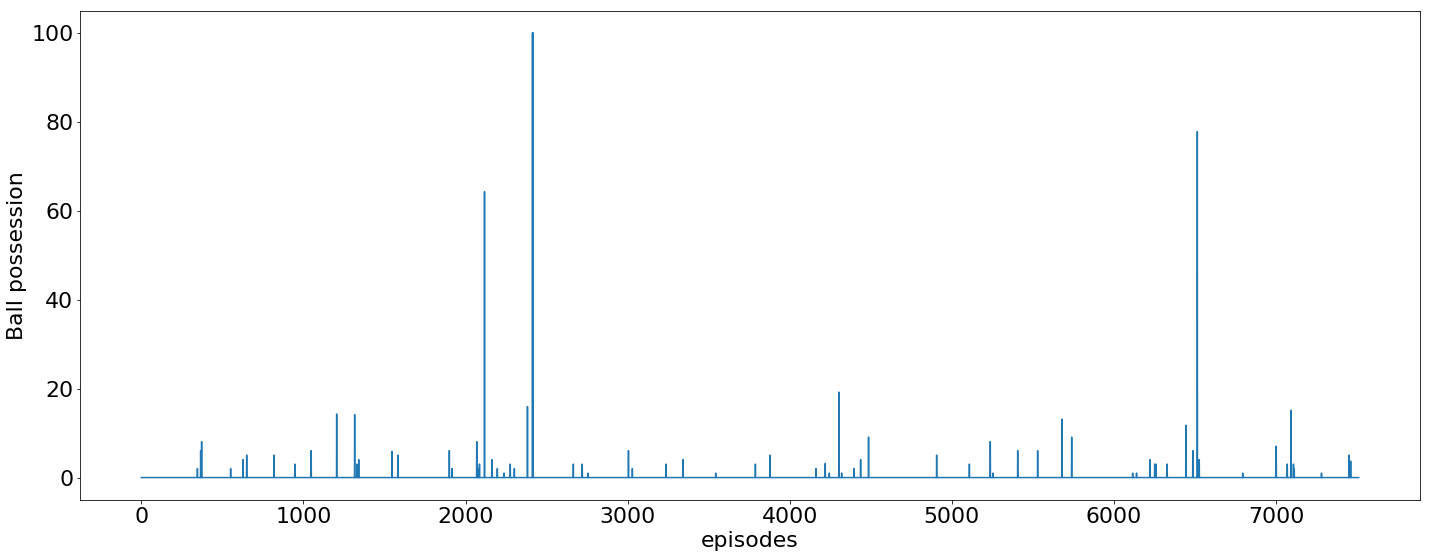

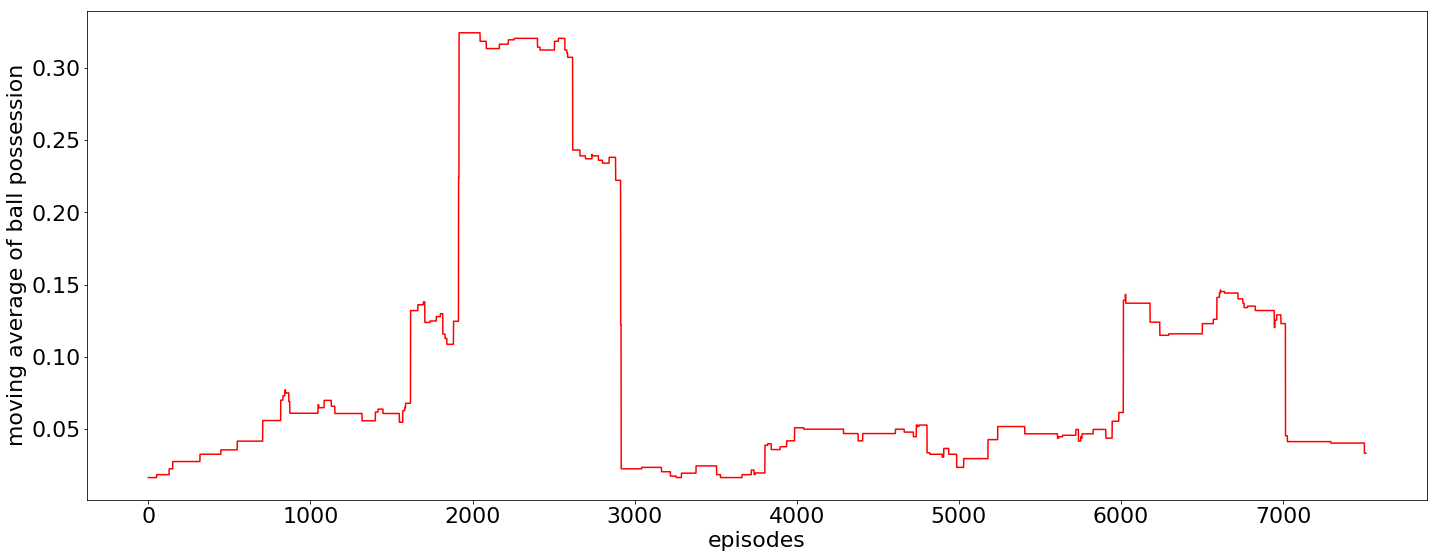

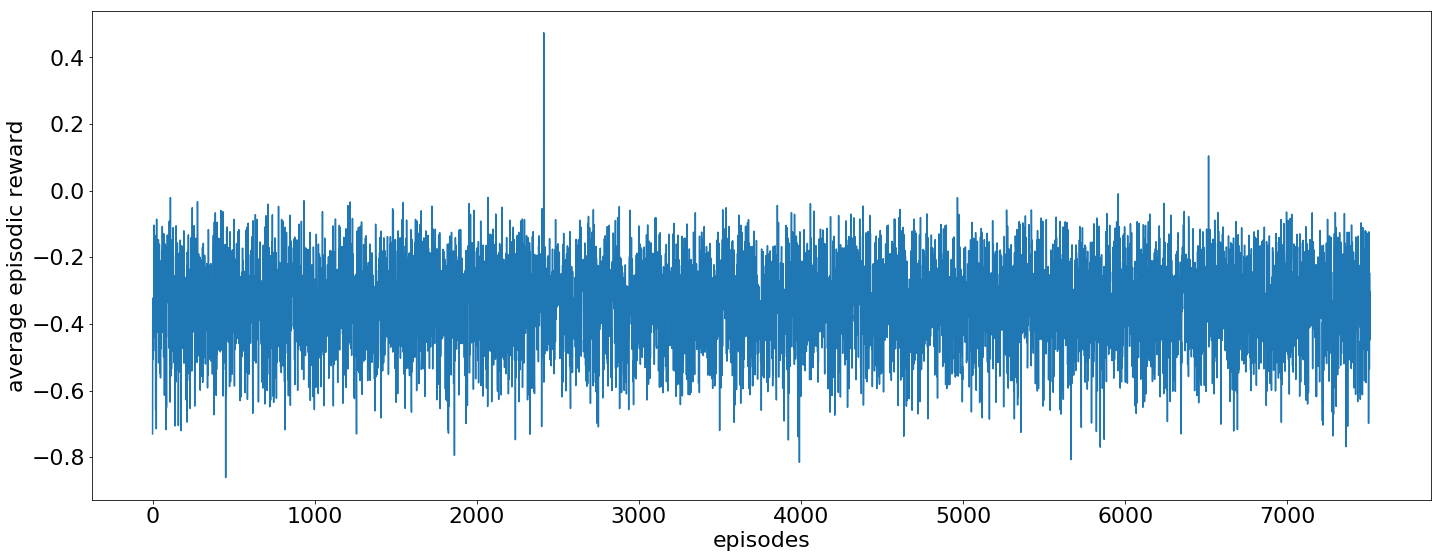

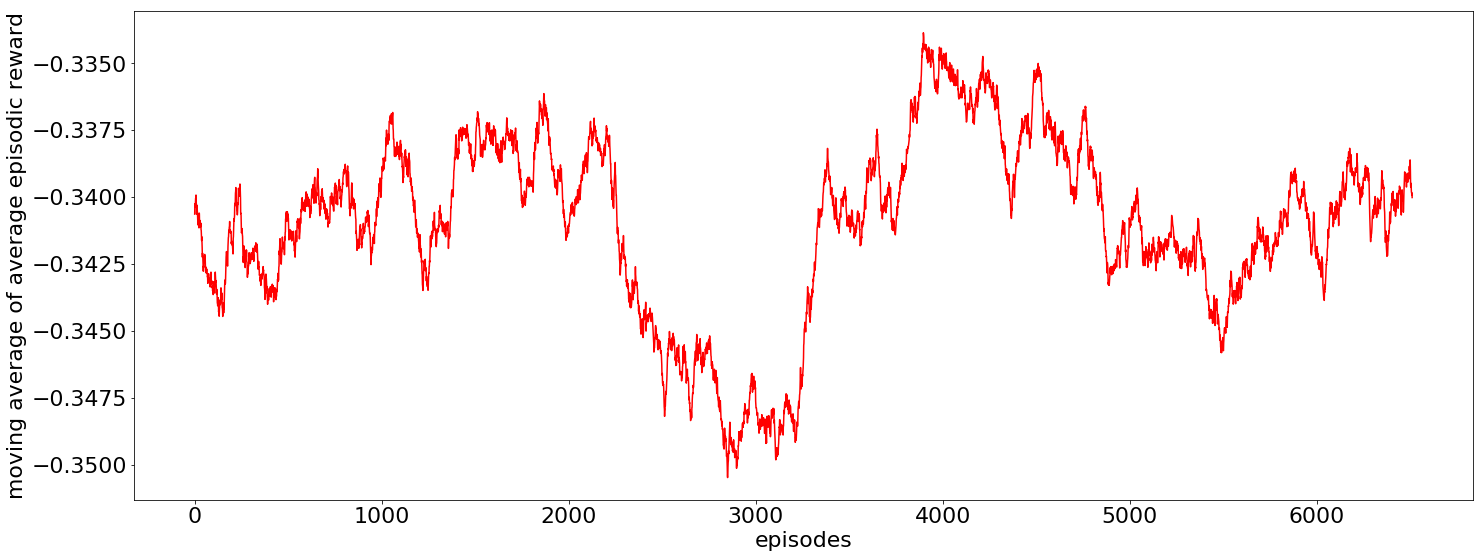

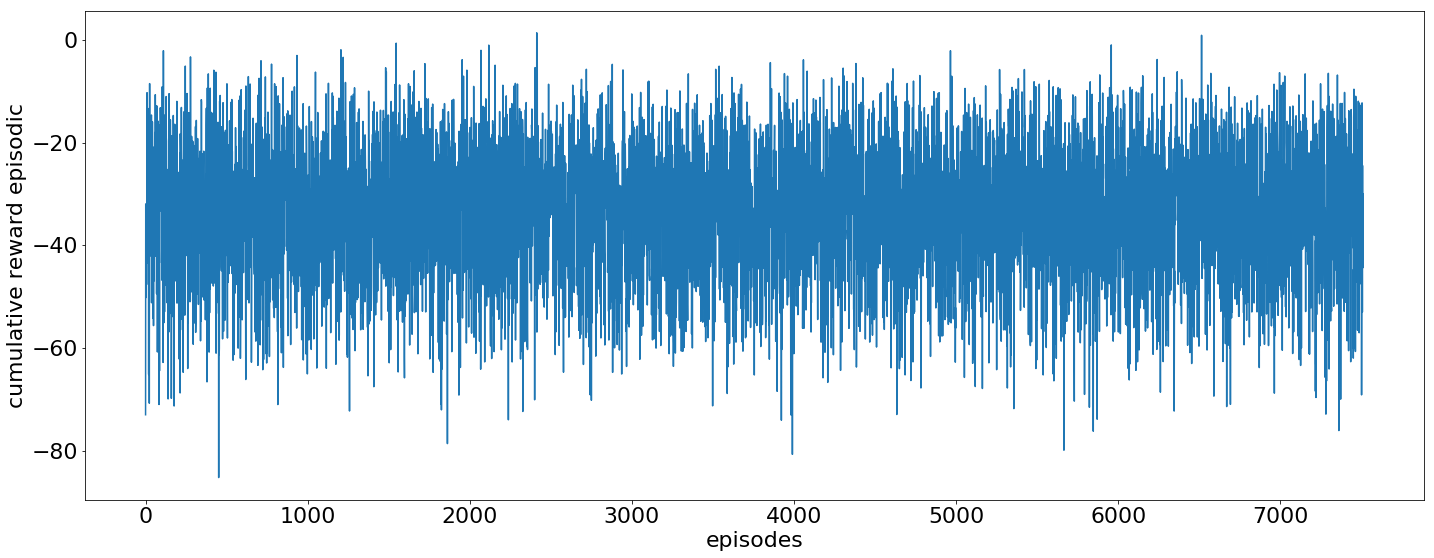

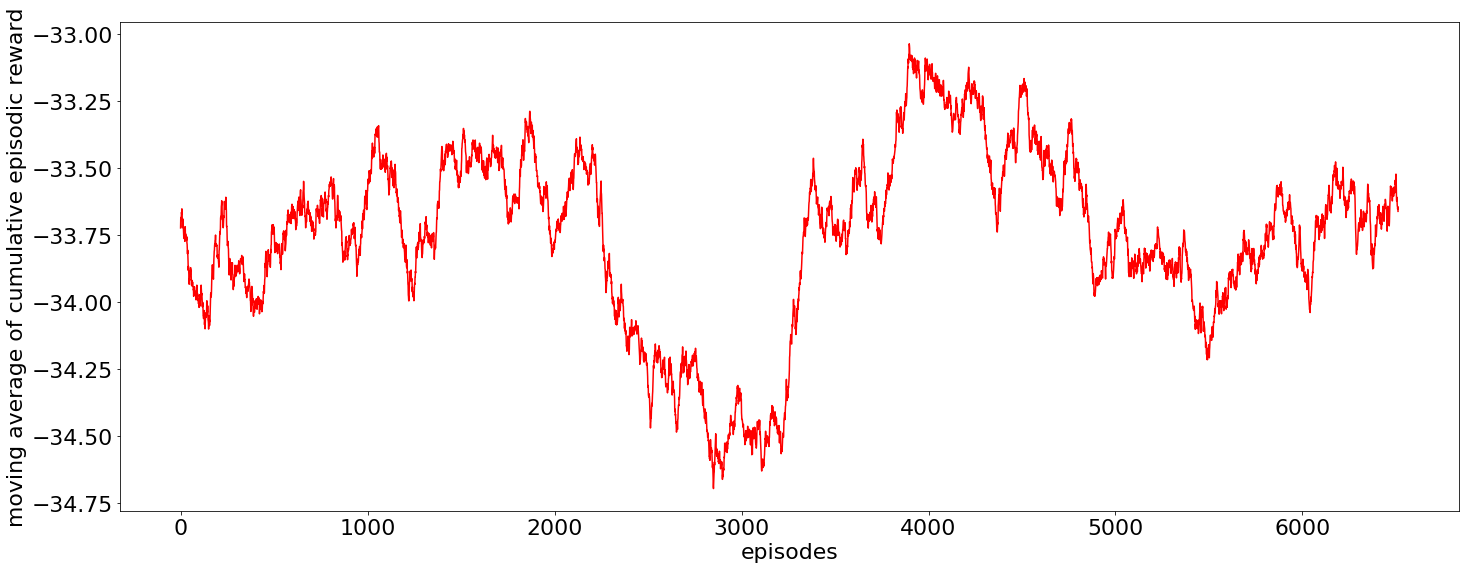

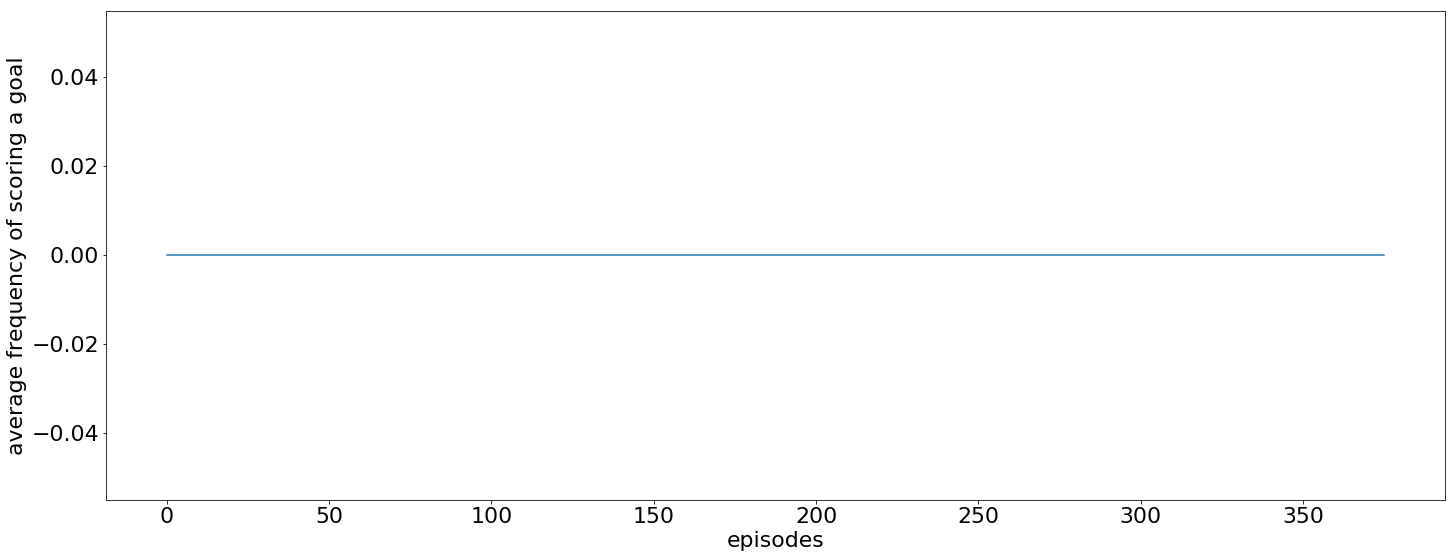

OutOfTime      7499
OutOfBounds      12
Name: why, dtype: int64

In [38]:
goal_frequency_window = 20

######################################---ball possession  and smoothed curve---#########################################################

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(data.kickable_percentages  )
plt.xlabel('episodes')
plt.ylabel('Ball possession')
plt.show()

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( np.convolve(data.kickable_percentages, np.ones((1000,))/1000, mode='same'), '-r' )
plt.xlabel('episodes')
plt.ylabel('moving average of ball possession')
plt.show()


######################################--- average episodic reward and smoothed curve-----#########################################################
reward = []
for i in range(len(data)):
    reward.append(literal_eval(data.average_reward[i]))
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(reward)
plt.xlabel('episodes')
plt.ylabel('average episodic reward')
plt.show()

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( np.convolve(np.ravel(reward) , np.ones((1000,))/1000, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('moving average of average episodic reward')
plt.show()
######################################--- cumulative episodic reward and smoothed curve-----#########################################################

reward = []
for i in range(len(data)):
    reward.append(literal_eval(data.cumulative_reward[i]))
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(reward)
plt.xlabel('episodes')
plt.ylabel('cumulative reward episodic')
plt.show()


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( np.convolve(np.ravel(reward) , np.ones((1000,))/1000, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('moving average of cumulative episodic reward')
plt.show()

#####################################################


goal_freq = []
for i in range(0, len(data), goal_frequency_window):
    temp = data.loc[i:i+goal_frequency_window].why.value_counts()
    
    try: 
        goal_freq.append(temp.Goal)
    except AttributeError:
        goal_freq.append(0)
        
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(goal_freq)
plt.xlabel('episodes')
plt.ylabel('average frequency of scoring a goal')
plt.show()
        
data.why.value_counts()

In [17]:
fname = 'log/base_left-11.log'
with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

In [18]:
#content
len(content)

1002576

In [40]:
GameStates = 0
StateFeatures = 0
actions_counter = 0

def act_analyzer(content):
    GameStates = 0
    StateFeatures = 0
    actions_counter = 0

    actions = pd.DataFrame(columns=['ts', 'act'])
    for i in range(len(content)):
        if content[i].split(' ')[3] == 'GameStatus':
            GameStates+=1
        elif content[i].split(' ')[3] == 'StateFeatures':
            StateFeatures +=1
        else:#if content[i].split(' ')[3] =='/home.sda4/home/ssajjadi/Desktop/ML/work/HFO-master/build/librcsc-prefix/src/librcsc/rcsc/player/player_agent.cpp:':
            actions_counter+=1
            actions = actions.append({'ts': content[i].split(' ')[0] ,
                                     'act': content[i].split(' ')[4]}, ignore_index= True )
    return actions

In [20]:
print('number of observed Game states as --GameStatus--: ', GameStates)
print('number of observed Game states as --:StateFeatures--: ', StateFeatures)
print('number of valid actions taken in the env: ' ,actions_counter)

number of observed Game states as --GameStatus--:  378959
number of observed Game states as --:StateFeatures--:  378959
number of valid actions taken in the env:  244658


In [41]:
act_analyzer(content[:1000])

,ts,act
0,1,"Dash(47.98,-20.52)"
1,3,"Dash(34.59,19.98)"
2,24,Turn(-151.36)
3,25,"Dash(61.43,-5.17)"
4,26,Turn(-180.00)
5,28,"Dash(60.23,-65.03)"
6,29,"Dash(50.81,-54.48)"
7,30,"Dash(51.19,-27.58)"
8,31,"Dash(45.43,-75.66)"
9,32,"Dash(71.24,-131.12)"


In [ ]:
chunksize = len(content)//(mp.cpu_count() - 1)
list_content = []
for i in range(0,len(content)-chunksize, chunksize):
    list_content.append(content[i:i+chunksize])
    
pool = mp.Pool(processes = (mp.cpu_count() - 1))
results = pool.map( act_analyzer,  list_content)
pool.close()
pool.join()

results_df = pd.concat(results)